# `DATA ANALYSIS`

## **TOPIC: FILMS ANALYSIS**

`Group ID`: 17

`Group Member`:
- 22127404_Tạ Minh Thư
- 22127359_Chu Thúy Quỳnh
- 22127302_Nguyễn Đăng Nhân

### Import

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read data from file

In [5]:
data = pd.read_csv('cleaned_data.csv', sep=",")
data

,Rank,Title,Foreign %,Domestic %,Year,Genre,Director,Writer,Cast
0,1,Avatar,73.1,26.9,2009,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",['James Cameron'],['James Cameron'],"['Sam Worthington', 'Zoe Saldana', 'Sigourney ..."
1,2,Avengers: Endgame,69.3,30.7,2019,"['Action', 'Adventure', 'Drama', 'Sci-Fi']","['Anthony Russo', 'Joe Russo']","['Christopher Markus', 'Stephen McFeely', 'Sta...","['Robert Downey Jr.', 'Chris Evans', 'Mark Ruf..."
2,3,Avatar: The Way of Water,70.5,29.5,2022,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",['James Cameron'],"['James Cameron', 'Rick Jaffa', 'Amanda Silver...","['Sam Worthington', 'Zoe Saldana', 'Sigourney ..."
3,4,Titanic,70.2,29.8,1997,"['Drama', 'Romance']",['James Cameron'],['James Cameron'],"['Leonardo DiCaprio', 'Kate Winslet', 'Billy Z..."
4,5,Star Wars: Episode VII - The Force Awakens,54.8,45.2,2015,"['Action', 'Adventure', 'Sci-Fi']",['J.J. Abrams'],"['Lawrence Kasdan', 'J.J. Abrams', 'Michael Ar...","['Daisy Ridley', 'John Boyega', 'Oscar Isaac',..."
...,...,...,...,...,...,...,...,...,...
995,996,The Final Destination,64.3,35.7,2009,"['Horror', 'Thriller']",['David R. Ellis'],"['Eric Bress', 'Jeffrey Reddick']","['Nick Zano', 'Krista Allen', 'Andrew Fiscella..."
996,997,Atlantis: The Lost Empire,54.8,45.2,2001,"['Action', 'Adventure', 'Animation', 'Family',...","['Gary Trousdale', 'Kirk Wise']","['Tab Murphy', 'Kirk Wise', 'Gary Trousdale', ...","['Michael J. Fox', 'Jim Varney', 'Corey Burton..."
997,998,Inside Man,52.4,47.6,2006,"['Crime', 'Drama', 'Mystery', 'Thriller']",['Spike Lee'],['Russell Gewirtz'],"['Denzel Washington', 'Clive Owen', 'Jodie Fos..."
998,999,The Waterboy,13.2,86.8,1998,"['Comedy', 'Sport']",['Frank Coraci'],"['Tim Herlihy', 'Adam Sandler']","['Adam Sandler', 'Kathy Bates', 'Henry Winkler..."


### Question 1: What are the highest-grossing genres over time?

**Purpose**: 
Identifying the most popular movie genres so that producers and film studios to focus on genres with higher revenue potential, allowing them to make strategic decisions regarding film development, production, and promotion. Understanding which genres attract the most viewers and have the potential to generate significant revenue will help filmmakers optimize their investment strategies and distribution plans.

**How do we answer this question**:
- If the genre column includes multiple genres for some movies, we need to split these into individual genres.

- Breaking the genres list into separate rows so that each genre of a movie gets its own row. This allows us to treat each genre independently for analysis.

- After the genres have been exploded into individual rows, we count how often each genre appears across all movies. This will give us a frequency distribution of genres and show which genres have the highest occurrence.

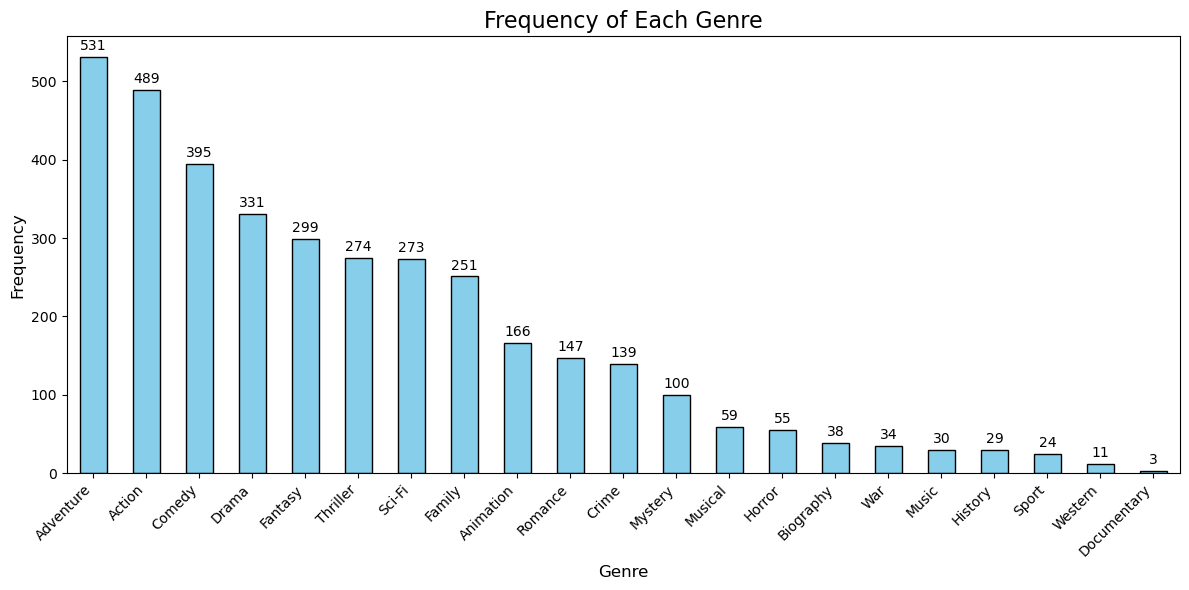

In [6]:
data['Genre'] = data['Genre'].apply(eval)
exploded_data = data.explode('Genre')

genre_counts = exploded_data['Genre'].value_counts()

plt.figure(figsize=(12, 6))
ax = genre_counts.plot(kind='bar', color='skyblue', edgecolor='black')

for i, count in enumerate(genre_counts):
    ax.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=10)

plt.title("Frequency of Each Genre", fontsize=16)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


- The Adventure and Action genres have the highest frequency of occurrences, with 531 and 489 occurrences, respectively. 
- The Comedy, Drama, Fantasy, and Thriller genres also have a significant presence, with 395, 331, 299, and 274 occurrences, respectively. 
- In contrast, genres like Western, Documentary, and War appear much less frequently, with 11, 3, and 34 occurrences, respectively.

#### Conclusion
- The highest-grossing genres over time are likely to be Adventure and Action. These genres have the highest frequency of occurrences, indicating that they are the most popular and likely to generate higher revenue. These films often have large production budgets, extensive marketing campaigns, and wide distribution, which contribute to their commercial success.

### Question 2: What role does the domestic gross percentage play in a movie’s rank?

- Purpose: determine whether domestic support (through local box-office sales) plays a significant role in a movie’s popularity, its commercial success, or if it’s the international market that drives its position in the rankings. This insight can help filmmakers and studios decide how much emphasis to place on domestic marketing, distribution strategies, and whether to focus more on the international market to boost their rankings.

**How do we answer this question**:
- Dividing the data into groups based on the ranges of "Domestic %": 0-20%, 20-40%, 40-60%, 60-80%, 80-100%. This grouping helps classify movies based on their level of reliance on domestic revenue. It makes it easier to compare groups of movies with similar characteristics.

- After grouping the data, calculating the average rank of movies within each group. The goal is to determine if there are any differences in rank between groups of movies with varying levels of domestic revenue. Calculating the average rank will help us identify trends, such as whether movies with higher domestic revenue tend to have higher ranks.

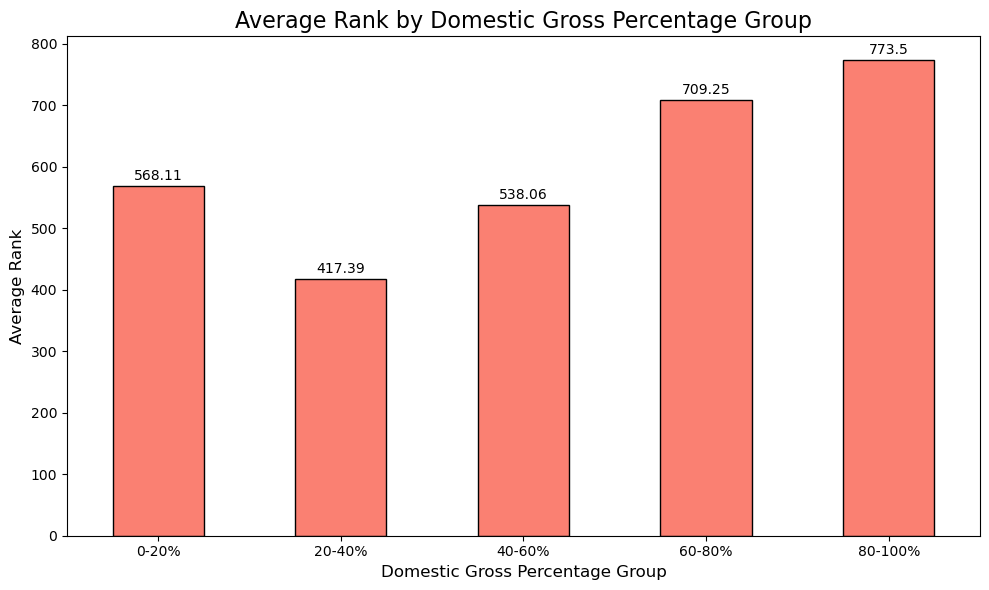

In [7]:
data['Domestic %'] = pd.to_numeric(data['Domestic %'], errors='coerce')

bins = [0, 20, 40, 60, 80, 100] 
labels = ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']
data['Domestic Group'] = pd.cut(data['Domestic %'], bins=bins, labels=labels, include_lowest=True)

grouped_data = data.groupby('Domestic Group')['Rank'].mean()

plt.figure(figsize=(10, 6))
ax = grouped_data.plot(kind='bar', color='salmon', edgecolor='black')

for i, rank in enumerate(grouped_data):
    ax.text(i, rank + 5, str(round(rank, 2)), ha='center', va='bottom', fontsize=10)

plt.title('Average Rank by Domestic Gross Percentage Group', fontsize=16)
plt.xlabel('Domestic Gross Percentage Group', fontsize=12)
plt.ylabel('Average Rank', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

- Group 0-20%: Movies in this group have relatively good average ranks compared to other groups, indicating that low domestic gross percentages do not necessarily correlate with low rankings.
- Group 20-40% This group has higher average rankings, suggesting that a moderate share of domestic gross may be associated with better performance on the ranking charts.
- Group 40-60%: Movies in this group tend to have lower average rankings compared to the 20-40% group, indicating no clear connection between average domestic gross percentages and better rankings.
- Group 60-80%: The average rank in this group is significantly lower, implying that movies heavily reliant on domestic gross might struggle to achieve high rankings.
- Group 80-100%: This group has the lowest average rank, showing that movies with a high domestic gross percentage often fail to achieve strong rankings, possibly due to a lack of international market success.

#### Conclusion
- Domestic gross percentage is not the sole determining factor for a movie’s rank. Movies with lower domestic gross percentages (0-40%) tend to achieve better average rankings than those heavily dependent on domestic gross (60-100%). This suggests that a balance between domestic and international revenue might contribute to a movie’s overall success.
- The international market plays a crucial role in boosting a movie’s ranking and overall success. Therefore, filmmakers should focus on designing global marketing campaigns and optimizing content to appeal to diverse cultures. This will help them expand their audience reach and increase their chances of achieving higher box-office revenue.

### Question 5: Which director - cast collaborations consistently result in movies with high gross revenue?


Purpose: To identify director-actor collaborations that consistently produce high-grossing movies, offering insights into patterns of success in the film industry. Additionally, it provides researchers and marketers with valuable data to understand trends, audience preferences, and the factors behind box office hits, ultimately guiding better decision-making in filmmaking and marketing strategies.

**How do we answer this question**
- Converts "Foreign %" and "Domestic %" to numeric values, handling errors and missing data.
- Cleans and splits list-like strings into actual lists for "Director" and "Cast".
- Splits multi-actor entries into individual rows.
- Groups by director-cast pairs and counts their occurrences and sorts pairs by frequency and selects the top 20.

              Director                  Cast  Count
2433     Peter Jackson          Ian McKellen      6
858       Dennis Dugan          Adam Sandler      6
1132    Gore Verbinski           Johnny Depp      5
2010   Martin Scorsese     Leonardo DiCaprio      5
3307        Tim Burton  Helena Bonham Carter      4
2775   Robert Zemeckis     Christopher Lloyd      4
235   Barry Sonnenfeld            Will Smith      4
3190  Steven Spielberg         Harrison Ford      4
818        David Yates          Rupert Grint      4
809        David Yates      Daniel Radcliffe      4


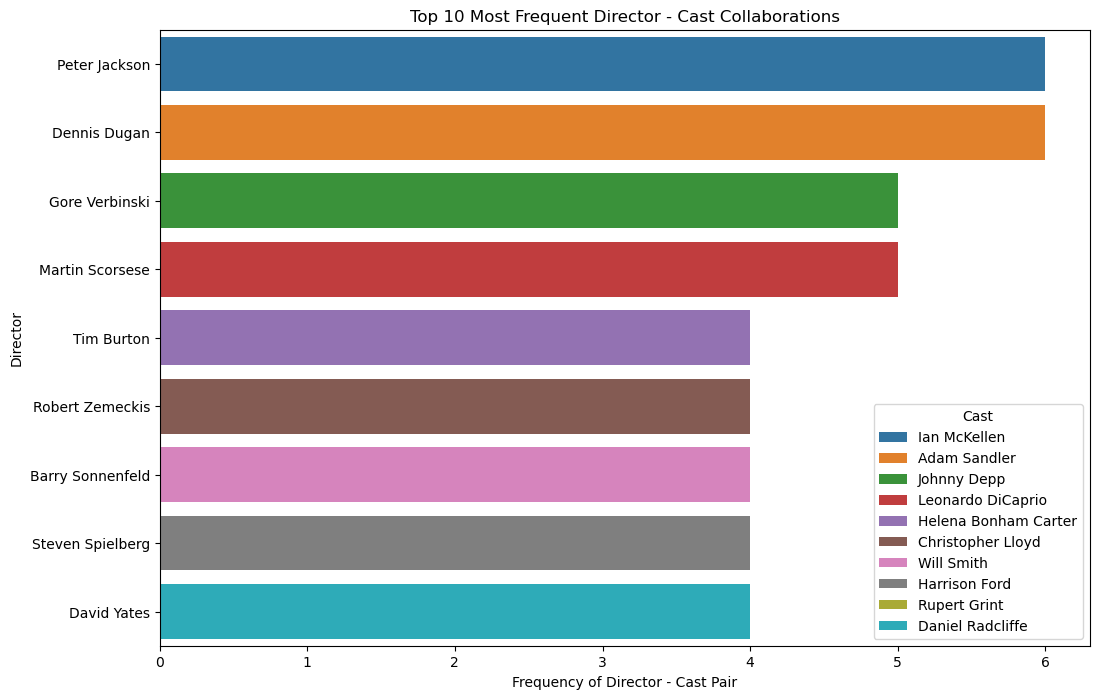

In [8]:
data["Foreign %"] = pd.to_numeric(data["Foreign %"], errors='coerce')
data["Domestic %"] = pd.to_numeric(data["Domestic %"], errors='coerce')

data["Total Gross %"] = data["Foreign %"] + data["Domestic %"]

data["Director"] = data["Director"].str.strip("[]").str.replace("'", "").str.split(", ")
data["Cast"] = data["Cast"].str.strip("[]").str.replace("'", "").str.split(", ")

data = data.explode("Cast")

data["Director"] = data["Director"].apply(lambda x: " ".join(x).strip() if isinstance(x, list) else "")
data["Cast"] = data["Cast"].fillna("").astype(str).str.strip()

director_cast_count = data.groupby(["Director", "Cast"]).size().reset_index(name="Count")

most_frequent_pairs = director_cast_count.sort_values(by="Count", ascending=False)

top_10 = most_frequent_pairs.head(10)

print(top_10)

plt.figure(figsize=(12, 8))

sns.barplot(data=top_10, x="Count", y="Director", hue="Cast", dodge=False)

plt.xlabel("Frequency of Director - Cast Pair")
plt.ylabel("Director")
plt.title("Top 10 Most Frequent Director - Cast Collaborations")

plt.show()


- Peter Jackson with Ian McKellen, Denis Dugan with Adam Sandler have the most frequent collaborations , as shown by the longest bar. This suggests that Peter Jackson and Denis Dugan often works with the same actors across multiple films.
- Gore Verbinski also have strong collaborations, though with fewer repetitions than Peter Jackson and Denis Dugan.
- The chart also indicates the variety of genres these directors and actors might be involved in, suggesting that repeated collaborations may result from specific genre types or thematic preferences.

#### Conclusion

- The bar chart shows that director - cast collaborations play a significant role in the movie industry, with directors like Peter Jackson and Denis Dugan forming long-term partnerships with specific actors. This may contribute to a consistent style or success in their films. 
- Frequent partnerships between specific directors and cast are often linked to higher gross revenues. Successful director - cast teams can create a loyal audience base, leading to consistently successful films at the box office.